<a href="https://colab.research.google.com/github/SunilKumarSingh84/Keras/blob/main/TF_Keras_RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM, Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [37]:
#Load MNIST data from tf datasets
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

#plt.imshow(X_train[np.random.randint(1,1000)], cmap='gray')

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)


In [11]:
N, T, D = X_train.shape
K = 10

i = Input(shape=(T,D))
x = LSTM(20)(i)
x = Dense(K, activation = 'softmax')(x)

model = Model(i, x)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])


r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.8234 - accuracy: 0.7466 - val_loss: 0.3748 - val_accuracy: 0.8898
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2956 - accuracy: 0.9140 - val_loss: 0.2460 - val_accuracy: 0.9279
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2127 - accuracy: 0.9387 - val_loss: 0.1902 - val_accuracy: 0.9436
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1703 - accuracy: 0.9506 - val_loss: 0.1548 - val_accuracy: 0.9523
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1460 - accuracy: 0.9565 - val_loss: 0.1460 - val_accuracy: 0.9563
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1311 - accuracy: 0.9615 - val_loss: 0.1160 - val_accuracy: 0.9651
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1186 - accuracy: 0.9653 - val_loss: 0.1112 - val_ac

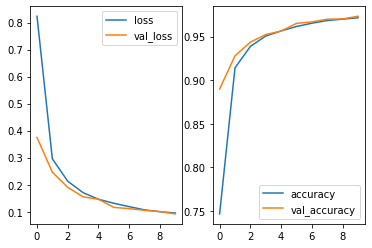

In [38]:
plt.subplot(1,2,1)
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

plt.show()

In [21]:
p_test = model.predict(X_test).argmax(axis=1)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, p_test)

array([[ 964,    0,    0,    1,    0,    0,    2,    1,   10,    2],
       [   0, 1126,    4,    0,    0,    0,    1,    0,    4,    0],
       [   1,    4, 1007,    4,    1,    1,    1,    3,   10,    0],
       [   0,    2,    7,  985,    0,    3,    0,    6,    5,    2],
       [   1,    2,    1,    0,  940,    0,    5,    2,    8,   23],
       [   0,    2,    1,   14,    0,  859,    3,    1,   11,    1],
       [   5,    4,    1,    0,    6,    6,  931,    0,    4,    1],
       [   0,    6,   11,    4,    2,    0,    0,  988,    3,   14],
       [   2,    0,    3,    7,    3,    3,    1,    1,  951,    3],
       [   1,    1,    0,    2,    5,    0,    0,    4,   14,  982]])

Text(0.5, 1.0, 'True Label: 2 Predicted Label: 7')

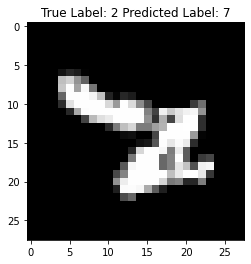

In [23]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True Label: %s Predicted Label: %s" %(y_test[i], p_test[i]))